In [1]:
!source activate py2

In [2]:
from OCC_class import *
from tqdm import tqdm

In [3]:
% matplotlib inline

In [4]:
X = np.loadtxt("optdigits.tra", delimiter=",", unpack=False)

In [5]:
def normalize(x):
    is_const = np.diff(x, axis = 0) == 0
    is_const = np.where(is_const.all(axis=0))[0]
    ix = [i for i in range(x.shape[1]) if i not in is_const]
    x = (x - np.mean(x, axis = 0))
    x[:,ix] = x[:,ix] / np.std(x[:,ix], axis = 0)
    return x

In [6]:
x = normalize(X[:1934,:])

In [7]:
occ = OSVM(x)
nu = 0.1
sigma2 = 2
occ.fit(nu, sigma2)
pred = occ.predict(x)

In [9]:
from tqdm import tqdm
param_grid = np.arange(0.000001, 0.0001, 0.000005)
nb_pred = []
sigma2 = 1

for param in tqdm(param_grid):
    occ = OSVM(x)
    occ.fit(param, sigma2)
    pred = occ.predict(x)
    nb_pred.append(np.min(pred))


  0%|          | 0/20 [00:00<?, ?it/s]
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/anaconda3/envs/py2/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/anaconda3/envs/py2/lib/python2.7/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/anaconda3/envs/py2/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration


100%|██████████| 20/20 [01:55<00:00,  5.76s/it]


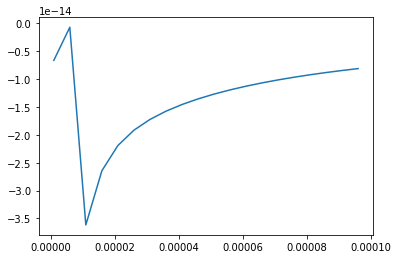

In [11]:
plt.plot(param_grid, nb_pred)

In [18]:
def load_img(path):
    imgs_set = [line.rstrip('\n') for line in open(path)]
    imgs = []
    labels = []
    tmp = []
    for i in tqdm(range(len(imgs_set))):
        if len(imgs_set[i]) == 32:
            tmp.append(list(imgs_set[i]))
        else:
            labels.append(imgs_set[i][1])
            imgs.append(np.array(np.reshape(tmp, (32,32)), dtype = float))
            tmp = []

    return imgs, labels

imgs, labels = load_img('optdigits-orig.tra')

100%|██████████| 63822/63822 [00:00<00:00, 91610.61it/s]


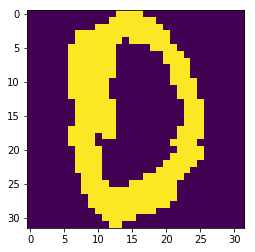

In [19]:
plt.imshow(imgs[0])

In [21]:
# Train
from sklearn.preprocessing import OneHotEncoder

X = np.loadtxt("optdigits.tra", delimiter=",", unpack=False)
X = X[:,:(X.shape[1]-1)]
labels = X[:,-1]
enc = OneHotEncoder()
labels = enc.fit_transform(np.reshape(labels, (len(labels),1))).toarray()

x = normalize(np.concatenate([X, labels], axis = 1))
print x.shape
occ = OSVM(x)
#occ = OkMeans(x)
nu = 0.05
sigma2 = 0.5*32**2
#occ.fit(thresh = 1, k = 30) # kNN & Kmeans
occ.fit(nu, sigma2) # OSVM

(3823, 80)


In [34]:
# Test

pred = occ.predict(x[:len(imgs),:])
ix_worse = np.argsort(pred, axis = 0)

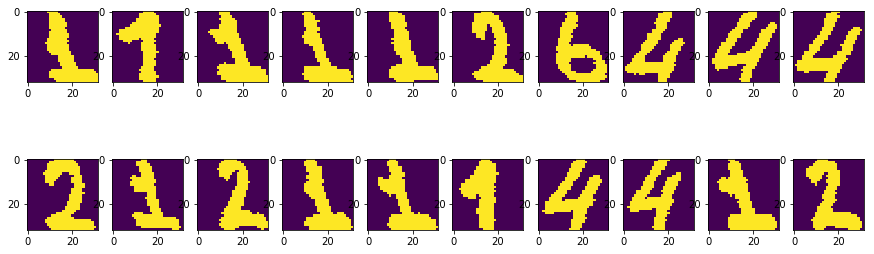

In [35]:
plt.figure(figsize = (15,5))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(imgs[ix_worse[i][0]])
    plt.subplot(2,10,i+11)
    plt.imshow(imgs[ix_worse[i+10][0]])